# Plotting Heatmaps and Histograms in Python

This notebook has examples to replicate some of the plots you have seen in R practice notebooks in Python. Study the notation, syntax, and output of the plots to see the implementation differences between R and Python. 

## Heatmaps

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
%matplotlib inline
import pandas

matplotlib.style.use('ggplot')       # Use ggplot style plots*

In [2]:
# Generate random 2D for plotting a heatmap. Below command will generate a 2D matrix of 10 rows and 12 columns.
uniform_data = np.random.rand(10, 12)

# Display first two rows of data
uniform_data[0:2,:]

array([[0.96024007, 0.73492046, 0.16947618, 0.0138749 , 0.33982772,
        0.89654987, 0.58978577, 0.42745721, 0.76319303, 0.84613973,
        0.84184474, 0.71914694],
       [0.84452055, 0.42745943, 0.97801238, 0.17338138, 0.13340649,
        0.3776068 , 0.55796541, 0.05699352, 0.71550507, 0.08465808,
        0.08798228, 0.7828213 ]])

Seaborn's heatmap plots rectangular data as a color-encoded matrix. It is an axes-level function and will draw the heatmap into the currently-active axes if none is provided to the ```ax``` argument. Below, the heatmap is assigned to ```ax``` handle. 

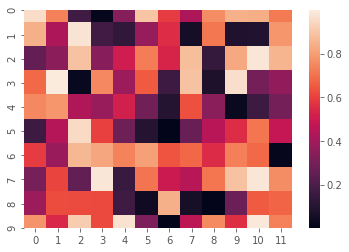

In [3]:
ax = sns.heatmap(uniform_data)

So, the map inferred the values for colormap from the data. But if you want to anchor the values for the colormap, you can do it using vmin and vmax arguments. 

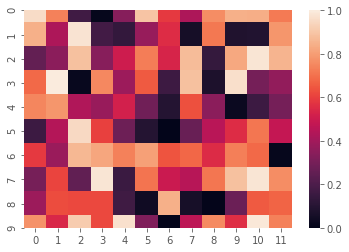

In [4]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

Here's an example on how to plot a heatmap using ```flights``` dataset. Load the data that comes with Seaborn package. Create a pivoted table which is just a matrix representation of the heatmap that the ```heatmap()``` function plots. Finally, use that pivot table to plot. 

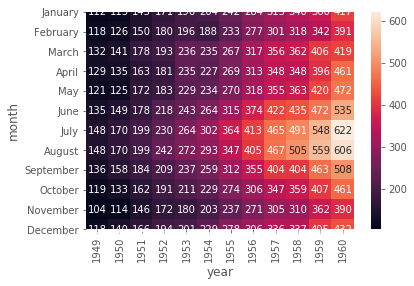

In [5]:
flights = sns.load_dataset("flights")
flightsp = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flightsp, annot=True, fmt="d")

The above plot is an **annotated heatmap** because we can see the numbers in the cells. 

For more examples, check the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for heatmaps.


**We can create similar plot with plotnine as following:** 

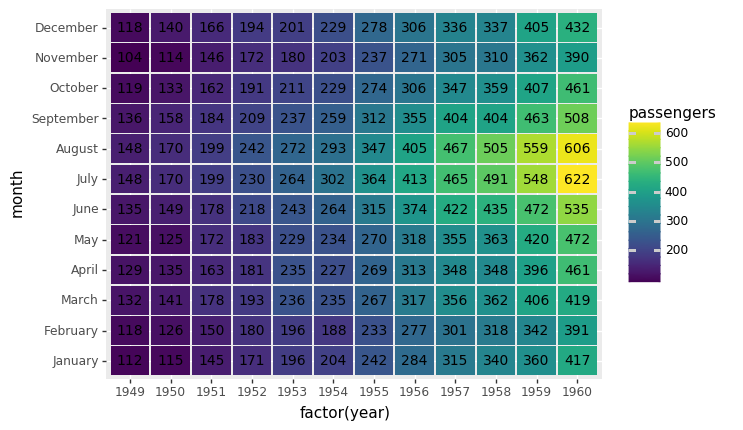

<ggplot: (-9223363287384774610)>

In [6]:
from plotnine import *

# We use geom_tile to create the heatmap, and geom_text to annotate it. 
# We use 'factor(year)' to have discrete values shown along the x-axis instead of 'year'.
# .95 spacing between the tiles.

(ggplot(flights, aes('factor(year)', 'month', fill='passengers'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='passengers'), size=10)
)


**Take a look at [here](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap) for other cool things you can do with geom_tile.** 

Let's load the Kings county data for house prices. we will plot a heatmap to show the distribution of houses between floors and the year in which the house is built. The blue tiles represent larger number of houses built and white tiles represent fewer number of houses built.


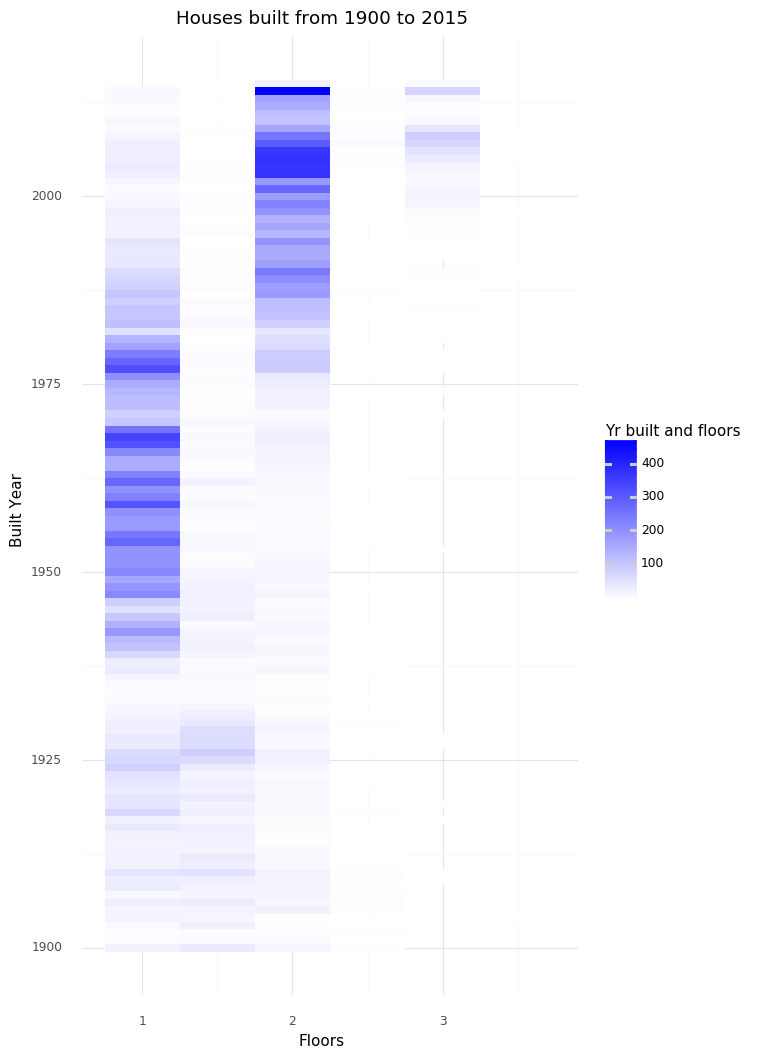

<ggplot: (8749462140003)>

In [7]:
kc_house_data = pd.read_csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv")
yr_built_floors = kc_house_data[["yr_built", "floors"]]
yr_built_floors.head()
yr_built_floors.groupby(["yr_built", "floors"]).size().reset_index()

# Get the frequency of each combination of yr_built and floors

yr_built_floors=yr_built_floors.groupby(["yr_built", "floors"]).size().reset_index()
yr_built_floors = yr_built_floors.rename({0:"Freq"}, axis=1)

p = ggplot(yr_built_floors, aes(x="floors", y="yr_built")) + geom_tile(aes(fill="Freq")) 
p = p + scale_fill_gradient(name = "Yr built and floors", low = "white", high="blue") 
p = p + xlab("Floors") + ylab("Built Year")+labs(title="Houses built from 1900 to 2015") + coord_fixed(ratio = 0.05) + theme_minimal()
p


## Histograms



In [8]:
usda_data=pd.read_csv("/dsa/data/all_datasets/USDA.csv")
usda_data.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [9]:
usda_data.describe()

,ID,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
count,7058.000000,7057.000000,7057.000000,7057.000000,7057.000000,6974.000000,6757.000000,6770.000000,5148.000000,6922.000000,6935.000000,6649.000000,6726.000000,4338.000000,4224.000000
mean,14259.821196,219.695338,11.710368,10.320614,20.697860,322.059220,3.452267,41.551994,8.256540,73.530627,2.828368,301.357949,9.435980,1.487462,0.576918
std,8577.179705,172.198755,10.919356,16.814191,27.630443,1045.416931,6.921267,122.963028,15.361509,222.445338,6.019878,415.638949,71.256536,5.386914,4.301147
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8387.250000,85.000000,2.290000,0.720000,0.000000,37.000000,0.172000,0.000000,0.000000,9.000000,0.520000,135.000000,0.000000,0.120000,0.000000
50%,13293.500000,181.000000,8.200000,4.370000,7.130000,79.000000,1.256000,3.000000,1.395000,19.000000,1.330000,250.000000,0.000000,0.270000,0.000000
75%,18336.750000,331.000000,20.430000,12.700000,28.170000,386.000000,4.028000,69.000000,7.875000,56.000000,2.620000,348.000000,3.100000,0.710000,0.100000
max,93600.000000,902.000000,88.320000,100.000000,100.000000,38758.000000,95.600000,3100.000000,99.800000,7364.000000,123.600000,16500.000000,2400.000000,149.400000,250.000000


### Qplot in ggplot

Qplot is a convenient wrapper for ggplot to create a number of different types of plots using a consistent calling scheme that is similar to the base graphics capability of R. It is also referred to as quick plot. 

In below plot, a histogram is plotted using the string **`histogram`** supplied to **`geom`** parameter. Binwidth tells ggplot to form bins of specified width. With a binwidth of 10, each bin in below plot represents a range of calories like (50-59) on x axis, and the data items falling within these ranges are counted and depicted as the frequencies of corresponding bins.

/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


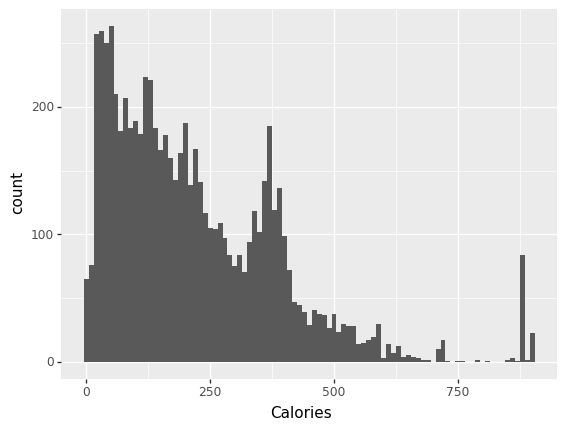

<ggplot: (8749426877139)>

In [10]:
qplot(data=usda_data, x="Calories",  geom="histogram", binwidth=10)

The **`weight`** aesthetic when used with histograms or bar charts can be used to create weighted histograms and bar charts. Here the height of the bar no longer represents count of observations, but a sum over some other variable.

/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


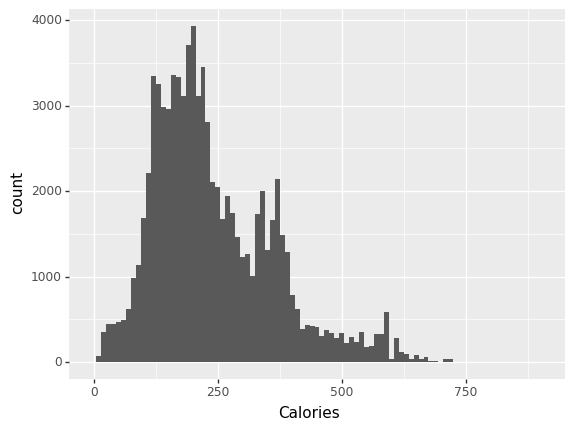

<ggplot: (8749459558057)>

In [11]:
qplot(data=usda_data, x="Calories",  geom="histogram",weight = "Protein", binwidth=10)

#### Layered Grammar of ggplot

We can use the ggplot syntax instead of qplot to create plots that follow the layered grammar convention of ggplot. The histogram can be also plotted like this:

/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


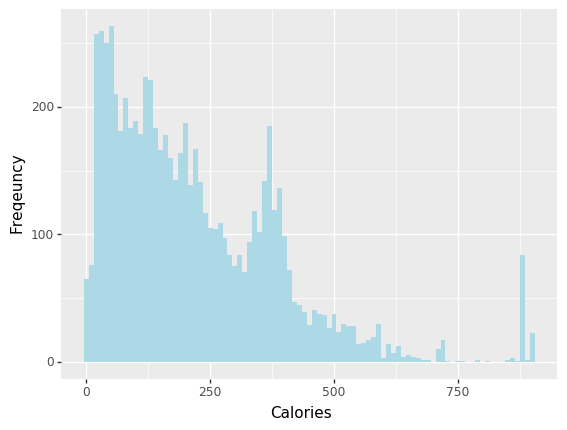

<ggplot: (-9223363287400485695)>

In [12]:
ggplot(usda_data, aes(x="Calories")) + geom_histogram(binwidth=10, fill="lightblue") + ylab("Freqeuncy")

#### Density Curve on Histogram

A density curve can be plotted on a histogram that represents the probability density function of that variable. Density can be overlayed on histogram with a transparent density plot. The alpha value controls the level of transparency as shown in below example. This shows the layered structure of ggplot where two layers (histogram and density) can be plotted on the same plot. Also, **..density..** is a derived variable computed by the ggplot on the fly.

/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/opt/conda/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


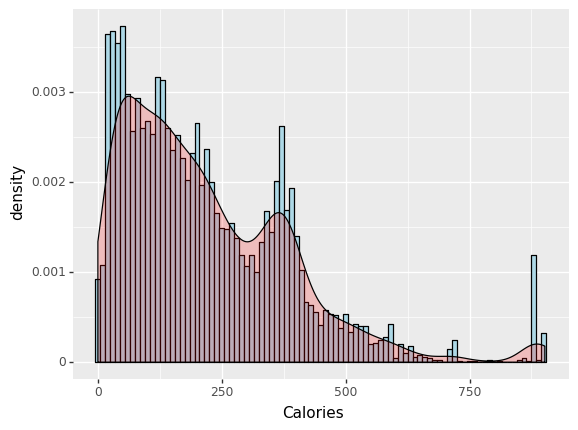

<ggplot: (-9223363287403048942)>

In [13]:
ggplot(usda_data, aes(x="Calories")) + \
    geom_histogram(aes(y="..density.."), colour = "black", fill="lightblue", binwidth=10) +\
    geom_density(alpha = .2, fill="red")